<center>

  ![picture](https://drive.google.com/uc?export=view&id=1vVPBPKJTAsDA8hxswV6iCH_wsgZbLULL)

</center>

# <center> Music Recommendation System </center>




**Team 1 :**

> Sai Nitheesh - IN30035 [Lead]


> Sai Harsha - IN30205



> Subhankar Satvaya - IN30134



> Shreyas Shoche - IN30045



> Ganesh Kashyap MR - IN30041



> Mentor : Ram Sir , Innomatics Research Labs















# Problem Statement 
This project Aims At Buiding The Best Music Recommendation System Using Million Song Dataset


# Dataset Description

<h6>The files contain:</h6>

*  The official indexing of songs (note that indexing starts at 1) : kaggle_songs.txt

*  The official ordering of user IDs for Kaggle submission : kaggle_users.txt

*  The visible half of the listening histories of the 110K evaluation users : kaggle_visible_evaluation_triplets.txt

*  The mapping from songs to tracks : taste_profile_song_to_tracks.txt

*  File containing the tracks / songs Information : unique_tracks.txt


<h5> We will be using kaggle_visible_evaluation_triplets.txt and unique_tracks.txt for our project </h5>
<li>The first file contains the play count mapping users
<li>The Second file contains information of songs mapping the song id , artist and release

<h5> Libraries Used </h5>
   <li> Numpy and Pandas For Processing the data and for statastical Analysis</li>
   <li> Seaborn , Matplotlib , plotly for visulizations</li>
   <li>Autoviz for Auto Visulizations</li>
       
 <h5>Tools used </h5>
 <li>Google Colab</li>
 <li>Tabuleau </li>

# <center> Exploratory Data Analysis </center>

## <center> 1. Import the libraries </center>

In [ ]:
pip install autoviz

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from autoviz.AutoViz_Class import AutoViz_Class
from pandas_profiling import ProfileReport

from google.colab import drive
import os


import warnings
warnings.filterwarnings('ignore')

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## <center> 2. Load triplet dataframe </center>

In [ ]:
triplet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Million Song Dataset/kaggle_visible_evaluation_triplets.txt' , sep='\t',names=['user_id','song_id','play_count'])

### <center> 2.1 Basic dataframe Analysis </center>

In [ ]:
triplet.head()

,user_id,song_id,play_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
triplet.tail()

,user_id,song_id,play_count
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2
1450932,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3


In [ ]:
triplet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1450933 non-null  object
 1   song_id     1450933 non-null  object
 2   play_count  1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


**Note**


*   We are having 1450933 Entries With 3 Columns
    *   user_id - Object
    *   song_id - Object
    *   play_count - Integer



In [ ]:
triplet.describe()

,play_count
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [ ]:
triplet.describe(include='object')

,user_id,song_id
count,1450933,1450933
unique,110000,163206
top,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOFRQTD12A81C233C0
freq,53,5043


**Note**


*   No.of Unique Users : 110000
*   No.of Unique Songs : 163206



In [ ]:
for i in triplet.columns:
    print(triplet.value_counts(i))
    print("\n \n")

user_id
7d90be8dfdbde170f036ce8a4b915440137cb11c    53
d30e18323f15426c3cdc8585252ed34459916f51    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
                                            ..
18cb5d68334667324a9bac0a66f6579f34f43a31     5
ae7a9eaf03f35908b8ffc420241f99e9c6057bf2     5
5519a61514f2248435a70afad322568c1a1173eb     5
47b83637c7726c40218552445e1dc9b906f0ad6d     5
336c306c5df497a9cb4067c14d5b840ba1a1e272     5
Length: 110000, dtype: int64

 

song_id
SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
                      ... 
SOQYUKJ12A8C137555       1
SOQYUND12A8C13B91D       1
SOHLOQG12A58A7C062       1
SOHLOLN12A6D4FBB75       1
SOSVEIH12A6D4F6C60       1
Length: 163206, dtype: int64

 

play_count
1      839136
2      213712
3       95726
5       73542
4       55158
        ...  
262      

### <center> 2.2.Check for Null Values </center>

In [ ]:
triplet.isnull().sum()

user_id       0
song_id       0
play_count    0
dtype: int64

**Note**


*   There are no values in any column



### <center>2.3Check for Outliers </center>

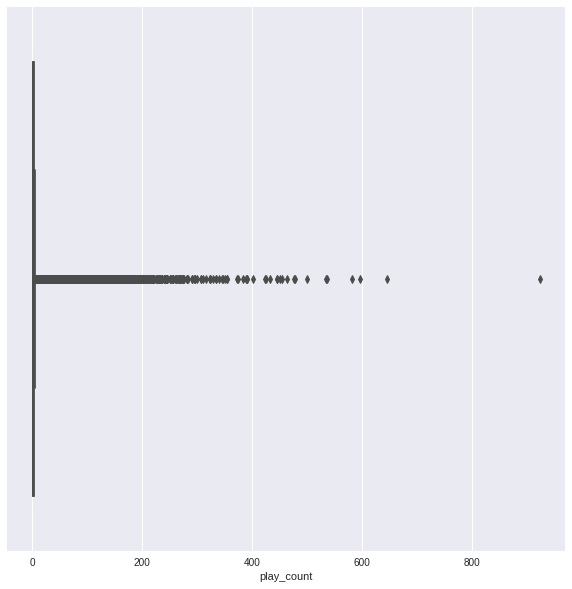

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = triplet, x = 'play_count')
plt.show()

**Note**
*   We Can Observe Outliers  in the play_count column.





## <center> 3.Load Tracks dataframe </center>

In [ ]:
tracks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Million Song Dataset/unique_tracks.txt',sep='<SEP>',
                     names=['track_id','song_id','artist','release'])

### <center> 3.1 Basic dataframe Analysis </center>

In [ ]:
tracks.head()

,track_id,song_id,artist,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
tracks.tail()

,track_id,song_id,artist,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  object
 1   song_id   1000000 non-null  object
 2   artist    1000000 non-null  object
 3   release   999985 non-null   object
dtypes: object(4)
memory usage: 30.5+ MB


**Note **

*   We have information of 1 Million Songs which gives four features of each song
  *   track_id - Object
  *   song_id - Object
  *   artist - Object
  *   release - Object




In [ ]:
tracks.describe(include='object')

,track_id,song_id,artist,release
count,1000000,1000000,1000000,999985
unique,1000000,999056,72665,702000
top,TRICPPB12903CDB7D2,SOQSEVR12A8C142841,Michael Jackson,Intro
freq,1,3,194,1511


**We can observe there are duplicated values in song_id**

In [ ]:
print('Duplicated values in Song_id :', sum(tracks['song_id'].duplicated()))

Duplicated values in Song_id : 944


**Note**


In the tracks dataframe, 

* There are about 1000000 unique track_ids
* There are about 999056 unique song_ids
* There are about 72665 unique artists
* There are about 702059 unique releases 
* There are 944 Duplicated Values of Songs
    


In [ ]:
# Value Counts in each column
for i in tracks.columns:
    print(tracks.value_counts(i))
    print("\n \n")

track_id
TRZZZZZ12903D05E3A    1
TRIQSBF12903D08196    1
TRIQSAY128F428A83D    1
TRIQSAT128F423D47E    1
TRIQSAR12903CFB2D8    1
                     ..
TRRHOTX128F42559F1    1
TRRHOTV12903D16143    1
TRRHOTO12903CA05BC    1
TRRHORW128F92D16F7    1
TRAAAAK128F9318786    1
Length: 1000000, dtype: int64

 

song_id
SOUVVMN12A8151E021    3
SOEJCHA12A8151E03D    3
SOHATSR12A6702045F    3
SOQNMCD12A8C1383D4    3
SOVSGJB12A8C13F772    3
                     ..
SOQNVDZ12AB01802B4    1
SOQNVDV12A6D4F6F7D    1
SOQNVDO12A8C131195    1
SOQNVDA12A8C130B34    1
SOAAABI12A8C13615F    1
Length: 999056, dtype: int64

 

artist
Michael Jackson                            194
Johnny Cash                                193
Beastie Boys                               187
Joan Baez                                  181
Neil Diamond                               176
                                          ... 
Greg Davis & Jeph Jerman                     1
Greg Davis_ Sébastien Roux                   1
Greg 

In [ ]:
#Unique Values in each column
for i in tracks.columns:
    print(tracks[i].unique())
    print("\n \n")

['TRMMMYQ128F932D901' 'TRMMMKD128F425225D' 'TRMMMRX128F93187D9' ...
 'TRYYYMG128F4260ECA' 'TRYYYDJ128F9310A21' 'TRYYYVU12903CD01E3']

 

['SOQMMHC12AB0180CB8' 'SOVFVAK12A8C1350D9' 'SOGTUKN12AB017F4F1' ...
 'SOHODZI12A8C137BB3' 'SOLXGOR12A81C21EB7' 'SOWXJXQ12AB0189F43']

 

['Faster Pussy cat' 'Karkkiautomaatti' 'Hudson Mohawke' ...
 "Pancho's Lament"
 'Ashley Tisdale/High School Musical Cast/Jemma McKenzie-Brown/Lucas Grabeel/Matt Prokop/Olesya Rulin/Vanessa Hudgens/Zac Efron'
 'Killer Mike feat. Gangsta Pill and Nario of Grind Time Rap Gang']

 

['Silent Night' 'Tanssi vaan' 'No One Could Ever' ... 'Jago Chhadeo'
 'Novemba' 'Fernweh feat. Sektion Kuchikäschtli']

 



### <center> 3.2 Check for Null Values </center>

In [ ]:
tracks.isna().sum()

track_id     0
song_id      0
artist       0
release     15
dtype: int64

**Note**

<p>

There are 15 null values in the release column
    
</p>

### <center> 3.3 Check of Outliers </center>

**Note**

<p>

All are categorical columns, outliers cannot be detected. 
    
</p>


## <center> 4.Merge the dataset </center>

In [ ]:
df = pd.merge(triplet, tracks.drop_duplicates(['song_id']), on="song_id", how="left")

**Duplicated values in Song_id are handled during Merging**

###<center> 4.1 Basic dataframe Analysis </center>

In [ ]:
df.head()

,user_id,song_id,play_count,track_id,artist,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [ ]:
df.tail()

,user_id,song_id,play_count,track_id,artist,release
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla
1450932,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3,TRZJNDO128EF343498,Angels and Airwaves,The Gift


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450933 entries, 0 to 1450932
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1450933 non-null  object
 1   song_id     1450933 non-null  object
 2   play_count  1450933 non-null  int64 
 3   track_id    1450933 non-null  object
 4   artist      1450933 non-null  object
 5   release     1450932 non-null  object
dtypes: int64(1), object(5)
memory usage: 77.5+ MB


**Note**


*   Now we have 1450933 with 6 coloumns



In [ ]:
df.describe(include='object')

,user_id,song_id,track_id,artist,release
count,1450933,1450933,1450933,1450933,1450932
unique,110000,163206,163206,28361,137622
top,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOFRQTD12A81C233C0,TRDMBIJ128F4290431,Coldplay,Sehr kosmisch
freq,53,5043,5043,12279,5043


**Note**



In the merged dataset,    
    
* There are 110000 unique user_id
* There are 163206 unique song_id
* There are 163206 unique track_id
* There are 28361 unique artist
* There are 137626 unique song release
    


In [ ]:
for i in df.columns:
    print("\n \n")
    print(df.value_counts(i))


 

user_id
7d90be8dfdbde170f036ce8a4b915440137cb11c    53
d30e18323f15426c3cdc8585252ed34459916f51    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
                                            ..
18cb5d68334667324a9bac0a66f6579f34f43a31     5
ae7a9eaf03f35908b8ffc420241f99e9c6057bf2     5
5519a61514f2248435a70afad322568c1a1173eb     5
47b83637c7726c40218552445e1dc9b906f0ad6d     5
336c306c5df497a9cb4067c14d5b840ba1a1e272     5
Length: 110000, dtype: int64

 

song_id
SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
                      ... 
SOQYUKJ12A8C137555       1
SOQYUND12A8C13B91D       1
SOHLOQG12A58A7C062       1
SOHLOLN12A6D4FBB75       1
SOSVEIH12A6D4F6C60       1
Length: 163206, dtype: int64

 

play_count
1      839136
2      213712
3       95726
5       73542
4       55158
        ...  
262  

### <center> 4.2 Check for Null values </center>

In [ ]:
df.isna().sum()

user_id       0
song_id       0
play_count    0
track_id      0
artist        0
release       1
dtype: int64

**Note**
*   There is one null value in release.





### <center> 4.3. Check for Outliers </center>

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df, x = 'play_count')
plt.show()

Note
* Outliers are present in the play_count column.

---
## <center> 5. Statistical Analysis </center>

In [ ]:
#create a copy of dataframe, so that original is not altered

song_df=df.copy()

In [ ]:
# Drop feature track_id, since we need either song_id or track_id.

song_df.drop('track_id',axis='columns', inplace=True)

In [ ]:
# Let's create a new column so that you have song and artist together

song_df['song']=df['artist']+ '-' + df['release']

In [ ]:
# Let's see top 5 records of the dataframe

song_df.head()

,user_id,song_id,play_count,artist,release,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,Dwight Yoakam-You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Cartola-Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon-Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,Miguel Calo-El Cuatrero


In [ ]:
# Let's see last 5 records of the dataframe

song_df.tail()

,user_id,song_id,play_count,artist,release,song
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,Mos Def,Ms. Fat Booty,Mos Def-Ms. Fat Booty
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,Sam Cooke,Ain't Misbehavin,Sam Cooke-Ain't Misbehavin
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,Southside Spinners,Luvstruck,Southside Spinners-Luvstruck
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla,J. Karjalainen & Mustat Lasit-Sinisten tähtien...
1450932,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3,Angels and Airwaves,The Gift,Angels and Airwaves-The Gift


In [ ]:
# We have what we need to use an Tabuleau tool to perform data analysis, we will go ahead and save it
song_df.to_csv('MSD.csv')

### <center>5.1 Analysis based on User </center>

In [ ]:
#create a dataframe to view just user_id and play_count
user_grouped = song_df.groupby(['user_id']).agg({'play_count':'count'}).reset_index()

In [ ]:
# Top 20 rows of the descendically ordered dataframe based on play_count
user_grouped.sort_values('play_count').head(20)

,user_id,play_count
22162,336c306c5df497a9cb4067c14d5b840ba1a1e272,5
30835,47b83637c7726c40218552445e1dc9b906f0ad6d,5
36524,5519a61514f2248435a70afad322568c1a1173eb,5
74891,ae7a9eaf03f35908b8ffc420241f99e9c6057bf2,5
10696,18cb5d68334667324a9bac0a66f6579f34f43a31,5
86060,c85a26afa43264fab15fcbace8fc8213ad6f52d9,5
86062,c85a7144791b1e1c001996c983ec361491490d44,5
68404,9f569df5e85e7bf7df348bd814a8beda50f205b5,5
36519,55149c41653b0f825f9edc4d670eac463079cc85,5
97733,e3712533767b2d8c04050a1503fe6a5afcc9b97f,5


In [ ]:
# Top 20 rows of the descendically ordered dataframe based on play_count
user_grouped.sort_values('play_count').tail(20)

,user_id,play_count
53975,7db2077964762a3889dd4d61444a8ba254b6365d,50
85687,c77574174ffe7118d90ac95c6671ff840858806a,50
13619,1fb619ced83fb4f92d4098709d7331b30e5e691c,50
86980,ca885bed5d391ccc0fda84e8eb4441e005f68bcd,50
74342,ad4b2717e89766b66b96fe52a38736116e315874,50
78924,b7bc5c9ea762079424d014c1b4e05e1d65d68861,50
66537,9b0f827c8bad0cf089b0d778307e1b390f463730,50
79643,b976263ea6b444c431759549a75b3650c66183a6,50
65684,992fea335363e87217e1b052fd7380b3fd7e35b4,51
21323,316110734d8da7478cc33237458814f770a9eb7a,51


In [ ]:
user_grouped.sort_values('play_count').shape

(110000, 2)

In [ ]:
user_grouped.describe()

,play_count
count,110000.000000
mean,13.190300
std,8.070827
min,5.000000
25%,7.000000
50%,11.000000
75%,17.000000
max,53.000000


**Note**

*  A user At least listens 5 Songs
*  On a Average a user listens 13 Songs
*  Maximum A User listens 53 Songs
*  Half of the users listens to less than 12 songs

### <center>5.2 Analysis based on Artist </center>

In [ ]:
#Create a artist focused dataframe
artist_grouped=song_df.groupby(['artist']).agg({'play_count':'count'}).reset_index()

In [ ]:
#Least played Artists
artist_grouped.sort_values('play_count').head(10)

,artist,play_count
28360,Özlem Tekin,1
4694,Chris Connelly and the Bells,1
15521,Mad Professor / Mafia & Fluxy,1
15528,Maddox Brothers & Rose,1
15544,Madreblu,1
15552,Maestro Luci,1
15557,Mafia K'1 Fry,1
15560,Maga Bo,1
15571,Magic Slim,1
15586,Magneta Lane,1


In [ ]:
#Top 10 Artist
artist_grouped.sort_values('play_count').tail(10)

,artist,play_count
17317,Muse,5849
18346,OneRepublic,6027
7969,Eminem,6297
23946,The Black Keys,6507
26441,Train,6617
11378,Jack Johnson,6784
12964,Justin Bieber,7669
8801,Florence + The Machine,8213
13610,Kings Of Leon,8514
5085,Coldplay,12279


In [ ]:
#Find the 20 most viewed songs

artist_grouped.nlargest(20, 'play_count')

,artist,play_count
5085,Coldplay,12279
13610,Kings Of Leon,8514
8801,Florence + The Machine,8213
12964,Justin Bieber,7669
11378,Jack Johnson,6784
26441,Train,6617
23946,The Black Keys,6507
7969,Eminem,6297
18346,OneRepublic,6027
17317,Muse,5849


In [ ]:
# Find the 20 least listend songs.

artist_grouped.nsmallest(10, 'play_count')

,artist,play_count
11,*Shels,1
18,1 40 4 20,1
21,1 Giant Leap feat. Eddi Reader_ The Mahotella ...,1
31,1000 Names,1
41,11/5,1
44,112 / Spragga Benz / Lady Saw / Buccaneer / Da...,1
45,112 / T.I.,1
46,113 Feat. Demon One,1
47,113 Feat. Mobb Deep,1
48,113 Feat. Molaré,1


**Note**

* Top 10 artist with most play_counts are :
  * Coldplay
  * kings of Leon
  * Florence + The Machine
  * Justin Beiber
  * Jack Jhonson
  * Train
  * The Black Keys
  * Eminem
  * OneRepblic
  * Muse
* Coldplay has most play count of 12279.



### <center>5.3 Analysis based on release </center>

In [ ]:
# create release (song_title) focused dataframe

release_grouped=song_df.groupby(['release']).agg({'play_count':'count'}).reset_index()

In [ ]:
release_grouped.sort_values('play_count').head(10)

,release,play_count
0,Ef Ég Hefði Aldrei...,1
70900,Making Love,1
70896,Making Friends and Acquaintances,1
70894,Making Flippy Floppy,1
70892,Making Dens,1
70889,Making A Perfect Yesterday,1
70888,Making A Noise (Olympic Version) (24-Bit Digit...,1
70902,Making Love Out Of Nothing At All (Live),1
70885,Makin' me hot,1
70879,Makin' Magic,1


In [ ]:
#Top 10 Releases
release_grouped.sort_values('play_count').tail(10)

,release,play_count
121358,Tive Sim,2669
37656,Fireflies,2745
47683,Hey_ Soul Sister,2791
49061,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272
98585,Secrets,3456
93984,Revelry,3672
28716,Dog Days Are Over (Radio Edit),3780
136066,You're The One,4270
125393,Undo,4483
98812,Sehr kosmisch,5043


In [ ]:
#Find the 20 most release songs

release_grouped.nlargest(20, 'play_count')

,release,play_count
98812,Sehr kosmisch,5043
125393,Undo,4483
136066,You're The One,4270
28716,Dog Days Are Over (Radio Edit),3780
93984,Revelry,3672
98585,Secrets,3456
49061,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272
47683,Hey_ Soul Sister,2791
37656,Fireflies,2745
121358,Tive Sim,2669


In [ ]:
#least 20 Releases
release_grouped.nsmallest(20, 'play_count')

,release,play_count
0,Ef Ég Hefði Aldrei...,1
2,"The Arsonist Story"": Evil Craves Attention/O...",1
5,Country Song,1
8,You,1
10,!Hoy Estreno!,1
16,#1 Crew In The Area (Edited),1
21,#1 Trap Pick,1
27,#19 (Album Version),1
28,#2,1
29,#2 (Album Version),1


**Note**

* Top 10 release with most play_counts are :
  * Sehr kosmisch
  * Undo
  * You're The One
  * JDog Days Are Over (Radio Edit)
  * Revelry, Secrets
  * Horn Concerto No. 4
  * Hey_ Soul Sister
  * Fireflies.
* Sehr kosmisch has most play count of 5043.

### <center>5.4 Analysis of Top 10 Artist </center>

*   Coldplay 
*   Kings Of Leon 
*   Florence + The Machine 
*   Justin Bieber 
*   Jack Johnson
*   Train
*   The Black Keys
*   Eminem
*   OneRepblic
*   Muse


In [ ]:
cold_play=song_df[song_df.artist == 'Coldplay']
cold_play.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
558905,6a048c2e7fe977abb52aff4c43889f2819788c54,SOPXKYD12A6D4FA876,261,Coldplay,Yellow,Coldplay-Yellow
457177,8b61442577c0a576e6fcf1e8f30659d277bbf4ee,SOMRYYN12A6310F0F3,136,Coldplay,In My Place,Coldplay-In My Place
189738,92bd5e054d2c92ba9eff0f19e2d700d99d05d0f7,SOPXKYD12A6D4FA876,129,Coldplay,Yellow,Coldplay-Yellow
267399,cdacddb9d0cdadc8528c5dfde0c1fbce619e525b,SOWEJXA12A6701C574,125,Coldplay,Fix You,Coldplay-Fix You
1148557,3a3330e185660b823bb9fbaaa2f1a0f7f2d46e8a,SOCVTLJ12A6310F0FD,90,Coldplay,Clocks,Coldplay-Clocks


In [ ]:
kings_of_leon=song_df[song_df.artist == 'Kings Of Leon']
kings_of_leon.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
268106,a93c63680854bc0c3fc10d923c2f0cf9d321384d,SOSXLTC12AF72A7F54,253,Kings Of Leon,Revelry,Kings Of Leon-Revelry
1347560,39a72c6e69ea8fc0c2c9b4ffbe5f90c2719bc39c,SOSXLTC12AF72A7F54,228,Kings Of Leon,Revelry,Kings Of Leon-Revelry
1148556,3a3330e185660b823bb9fbaaa2f1a0f7f2d46e8a,SOSXLTC12AF72A7F54,213,Kings Of Leon,Revelry,Kings Of Leon-Revelry
1257578,e72caa36b7047157dca28bed525fdeb9abef6789,SOSXLTC12AF72A7F54,191,Kings Of Leon,Revelry,Kings Of Leon-Revelry
1154041,aba7d62f7ba3468084a9276d1ea5ecffed41f9e4,SOSXLTC12AF72A7F54,186,Kings Of Leon,Revelry,Kings Of Leon-Revelry


In [ ]:
flo_the_mach=song_df[song_df.artist == 'Florence + The Machine']
flo_the_mach.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
70297,801ae0eda0556cad306e75b0aeabe3e6524ad661,SOWLFNL12AB017DB20,196,Florence + The Machine,Bird Song,Florence + The Machine-Bird Song
61026,3befe0a9e7457b49e2e396afed8952305e0f10f5,SOAXGDH12A8C13F8A1,145,Florence + The Machine,Dog Days Are Over (Radio Edit),Florence + The Machine-Dog Days Are Over (Radi...
573010,01cae816e7e21479ec470e1ffbc8e2c0e3f8064c,SOILFUU12AB017C75F,119,Florence + The Machine,I'm Not Calling You A Liar,Florence + The Machine-I'm Not Calling You A Liar
387099,826e83504ab33a69d308d3f7b544bf662f8a9568,SOAXGDH12A8C13F8A1,106,Florence + The Machine,Dog Days Are Over (Radio Edit),Florence + The Machine-Dog Days Are Over (Radi...
736085,480cdfbd50b539bf8749f9201d10763fd7143fed,SOHFNKO12AB017C772,102,Florence + The Machine,Kiss With A Fist,Florence + The Machine-Kiss With A Fist


In [ ]:
JB=song_df[song_df.artist == 'Justin Bieber']
JB.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
336273,98bb6d608734890fd558589c97fc914c22033a36,SOJUXGA12AC961885C,143,Justin Bieber,Up,Justin Bieber-Up
1156180,7200bbe671a328c2f57b28e417bfa3a6c7ed4392,SOUGCDK12AC95F075F,109,Justin Bieber,Never Let You Go,Justin Bieber-Never Let You Go
280803,6e3dc3bb5a4bc837cfca5326b58325b1664364e5,SODGVGW12AC9075A8D,102,Justin Bieber,Somebody To Love,Justin Bieber-Somebody To Love
268100,a93c63680854bc0c3fc10d923c2f0cf9d321384d,SOWCBKV12AC90732A6,87,Justin Bieber,One Less Lonely Girl,Justin Bieber-One Less Lonely Girl
698656,b2f15de6bebb262aaf097b34ad3242994808d1fe,SODGVGW12AC9075A8D,84,Justin Bieber,Somebody To Love,Justin Bieber-Somebody To Love


In [ ]:
JJ=song_df[song_df.artist == 'Jack Johnson']
JJ.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
845260,6e2e840f6e717c883efec5115e1f25bb805765c1,SOVGLTY12AF72A39CD,454,Jack Johnson,Better Together,Jack Johnson-Better Together
1233111,7c2ddfeccc4f69a9a9ca98187a58669d57688a45,SOXDQPZ12A8C13F4FC,120,Jack Johnson,Staple It Together,Jack Johnson-Staple It Together
793624,c39db14f97dbd2e1063144ea0a5d543993a543ad,SODBMRI12A8151AF45,83,Jack Johnson,Angel,Jack Johnson-Angel
195856,449e1f3ac06c0b84f3e70c6d5aa259b4b1ca7733,SOPBTDA12A58A7B7C3,72,Jack Johnson,Questions,Jack Johnson-Questions
555213,938c2632d43eeadb8a83a7cc254d014f9cea6afe,SOUMOMJ12A6701DFDC,72,Jack Johnson,The News,Jack Johnson-The News


In [ ]:
train=song_df[song_df.artist == 'Train']
train.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
1151487,c6162e848d033652b6ef337c997ad93f56156dc1,SOTWNDJ12A8C143984,166,Train,Marry Me,Train-Marry Me
1362611,7424c499818b3be97facacd57a91089d4e094004,SODJWHY12A8C142CCE,108,Train,Hey_ Soul Sister,Train-Hey_ Soul Sister
1061851,40f848da4de34a443be060417ae3059fb6da0ee7,SOTWNDJ12A8C143984,103,Train,Marry Me,Train-Marry Me
1406,812326d41be139cdacdf487df987740a21e870d6,SOTWNDJ12A8C143984,89,Train,Marry Me,Train-Marry Me
518377,2a1cf488351b567f119f2d623a2405f5f2291532,SOFOJNT12A8C13615D,86,Train,Ramble On,Train-Ramble On


In [ ]:
black_keys=song_df[song_df.artist == 'The Black Keys']
black_keys.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
1215543,d5d8c4135cb97c4dd1c41948982bfac3a7c99b8d,SOQAJHW12AB0186004,160,The Black Keys,Every Lasting Light,The Black Keys-Every Lasting Light
189734,92bd5e054d2c92ba9eff0f19e2d700d99d05d0f7,SOVRTPN12AB0184F9E,96,The Black Keys,Howlin For You,The Black Keys-Howlin For You
920011,9ac285181622dcfd6f6bd1bc92dac8e2c730eb02,SONGYFE12AB018562D,72,The Black Keys,All Hands Against His Own,The Black Keys-All Hands Against His Own
890493,077ee0595c0b55c297786ea3cfdb7ee28fb3ca0b,SOVRTPN12AB0184F9E,71,The Black Keys,Howlin For You,The Black Keys-Howlin For You
1117180,8b6fa63de8328fdab344b21e7f5c0de7b01e72e8,SOLLDVS12AB0183835,66,The Black Keys,I'll Be Your Man,The Black Keys-I'll Be Your Man


In [ ]:
MnM=song_df[song_df.artist == 'Eminem']
MnM.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
1402480,cd0102f35cee04da23278b78816ad0a9104c1eb8,SOWGXOP12A6701E93A,98,Eminem,Without Me,Eminem-Without Me
1040501,ee827f13e997585f06d80e4a310f330637b90b81,SOWMUWQ12AF729E1E7,85,Eminem,Mr. Mathers,Eminem-Mr. Mathers
713330,78f89456846fbcfc2ab682de9bb4281ee36a5ee2,SOPCTBB12AF72A1B64,79,Eminem,Hailie's Song,Eminem-Hailie's Song
828732,0715d5f472c7f72d0d816d45adc801170f6afa68,SOPCTBB12AF72A1B64,75,Eminem,Hailie's Song,Eminem-Hailie's Song
294001,6b937abb28d42a658ba380ec0501394ac21946a7,SOKOXWU12AF72AD1BC,69,Eminem,The Real Slim Shady,Eminem-The Real Slim Shady


In [ ]:
One_Republic=song_df[song_df.artist == 'OneRepublic']
One_Republic.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
279372,6353578ea9fd99fd8d1f2bc36563889886041f66,SOQIKXH12A6D4FD113,104,OneRepublic,Come Home,OneRepublic-Come Home
277219,e44e032804075ae8ba002166314333222e69a7ac,SONYKOW12AB01849C9,77,OneRepublic,Secrets,OneRepublic-Secrets
50305,cfd35c09174acbeb13090ae4220bcb0b3ef0cccf,SONYKOW12AB01849C9,69,OneRepublic,Secrets,OneRepublic-Secrets
1038144,1d701b8d4b225e7b6eb7ffb25f50716c9e6d1779,SOBKMNJ12AF729BCA3,66,OneRepublic,Missing Persons 1 & 2,OneRepublic-Missing Persons 1 & 2
857258,b6a1fa37790c4bc1851af2b25070c442e025cd6c,SONYKOW12AB01849C9,62,OneRepublic,Secrets,OneRepublic-Secrets


In [ ]:
Muse=song_df[song_df.artist == 'Muse']
Muse.nlargest(5,'play_count')

,user_id,song_id,play_count,artist,release,song
997417,d1d845a92cd34456423e781512bdb502ca385b51,SOUIEEX12A6D4F858C,181,Muse,Dead Star [Live From Le Zenith],Muse-Dead Star [Live From Le Zenith]
288238,a5c880cab8115c75871976457ae0052b830c23e7,SOXAQJS12AB018CBF7,82,Muse,Resistance,Muse-Resistance
744750,e624c90716a0f1fd5ce89444cb59cf6db5f8a2b3,SOANQFY12AB0183239,74,Muse,Uprising,Muse-Uprising
1065938,362968edc69241ac645a43929a2be09899521018,SOFJWPF12A6D4F570E,72,Muse,Hoodoo,Muse-Hoodoo
6344,9ca08e25a5c4144b1f2cd6890d8cb65717e7c73e,SOISUWI12A6D4F5708,65,Muse,Starlight,Muse-Starlight


In [ ]:
# let's add a percentage column which tells the percentage of each user_id play count based on total

song_grouped=song_df.groupby(['song']).agg({'play_count':'count'}).reset_index()
grouped_sum=song_grouped['play_count'].sum()
song_grouped['percentage']=(song_grouped['play_count']/grouped_sum)*100
song_grouped.sort_values(['play_count','song'],ascending=[0,1])

,song,play_count,percentage
59878,Harmonia-Sehr kosmisch,5043,0.347570
17175,Björk-Undo,4483,0.308974
42714,Dwight Yoakam-You're The One,4136,0.285058
51326,Florence + The Machine-Dog Days Are Over (Radi...,3780,0.260522
77664,Kings Of Leon-Revelry,3672,0.253079
...,...,...,...
162028,Ólafur Arnalds-Himininn er að hrynja_ en stjör...,1,0.000069
162030,Ólafur Arnalds-Kjurrt,1,0.000069
162037,Ólafur Arnalds-Við vorum smá...,1,0.000069
162041,Órla Fallon-The Water Is Wide,1,0.000069


***These are the popular songs we can suggest these songs if we would like to go for popularity based recommendation system***

### <center> 5.5 Summary Of Statastical Analysis</center>
<ul>
    <li>Top Artist - Coldplay</li>
    <li>Top Song - Sher Kosmisch By Harmonia</li>
    <li>Half of the users listens to less than 12 songs</li>
    <li>Top Five artists :</li>
        <ul>
            <li>Coldplay</li>
            <li>Kings of Leon</li>
            <li>Florence + The Machine</li>
            <li>Justin Bieber</li>
            <li>Jack Johnson</li>
        </ul>
     <li>Sorted the poular songs we can suggest these songs if we would like to go for popularity based recommendation system</li>
    <li>Future Work :</li>
    <ul><li>Pearson Corelation for Item to Item and User to User</li></ul>
            
            

---
## <center> 6. Univariate Analysis</center>

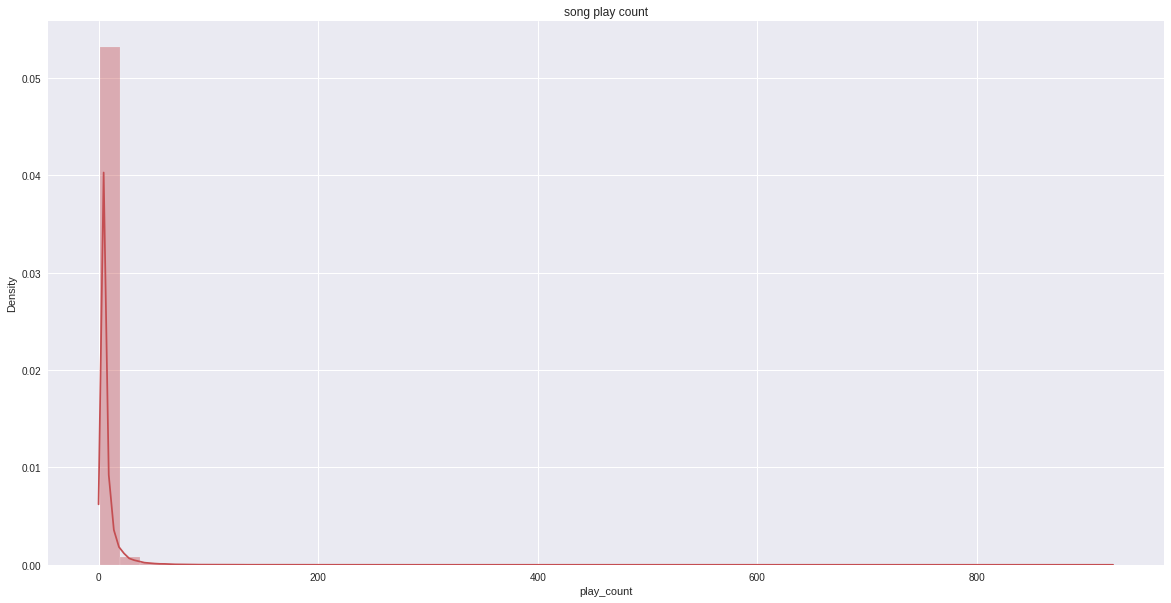

In [ ]:
#Analysis of Play Count
plt.figure(figsize=(20,10))
sns.distplot(triplet['play_count'],color="r")
plt.title("song play count");

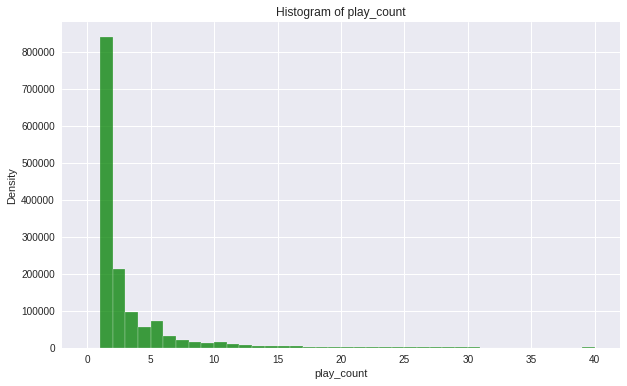

In [ ]:
#Histogram Of PlayCount
plt.figure(figsize=(10,6))
plt.hist(x=df['play_count'], bins=40, facecolor='green', alpha=0.75,range=[0,40])
plt.xlabel("play_count")
plt.ylabel("Density")
plt.title("Histogram of play_count")
plt.show()

**Note**


*   Can Observe that most of play count is below 15




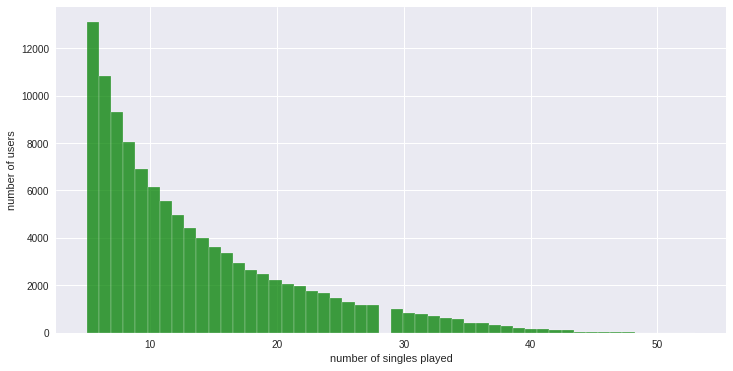

In [ ]:
#User_Song Distribution
user_song_count_distribution = df[['user_id','release']].groupby('user_id').count().reset_index().sort_values(
by='release',ascending = False)
x = user_song_count_distribution.release
plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)
plt.xlabel(u'number of singles played')
plt.ylabel(u'number of users')
plt.grid(True)

Note : 


*   Most of Users Played Below 10 Songs




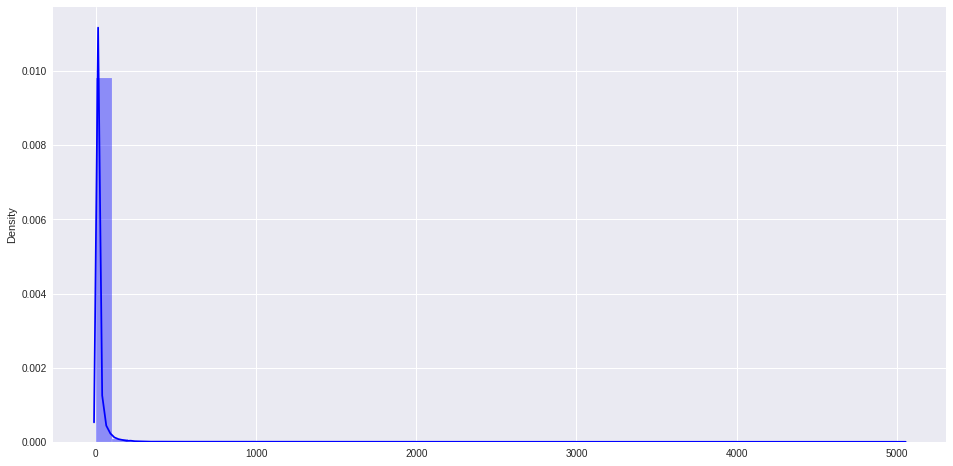

In [ ]:
#How many users listen to the same song on average ?
song_user = df.groupby('song_id')['user_id'].count()
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [ ]:
print(f"A song is listened for an average of {np.mean(song_user)} users, with minimum {np.min(song_user)} and maximum {np.max(song_user)} users")

A song is listened for an average of 8.890193987966128 users, with minimum 1 and maximum 5043 users


In [ ]:
#Resampling data For Pandas Profiling
df2 = df.sample(n=10000, random_state=0)

In [ ]:
AV = AutoViz_Class()

Shape of your Data Set: (10000, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  4
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables


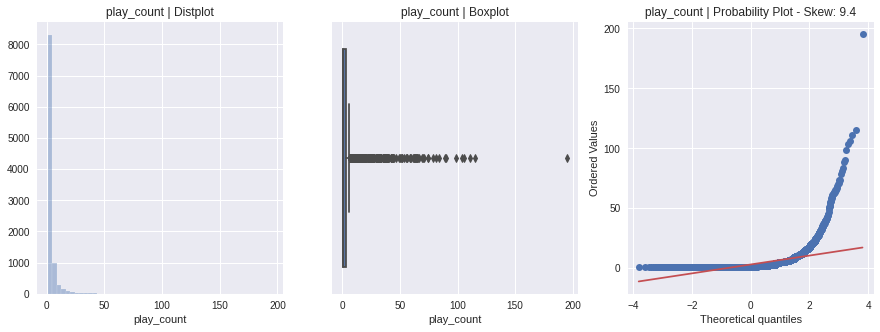

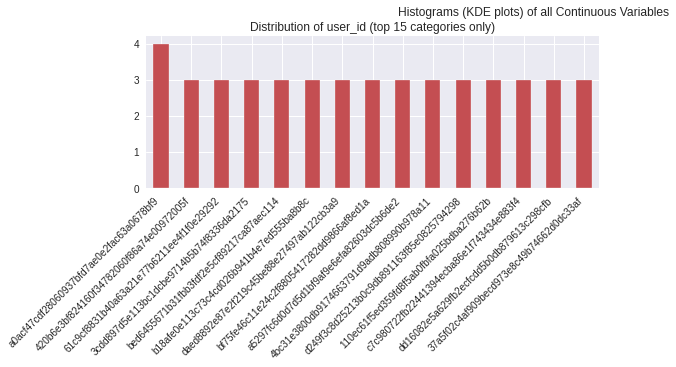

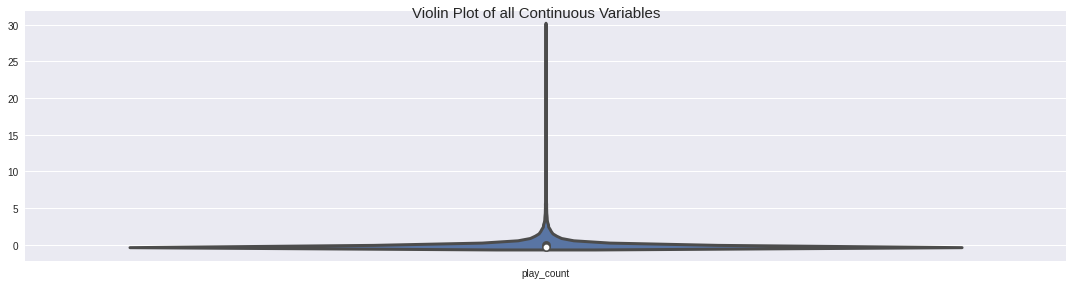

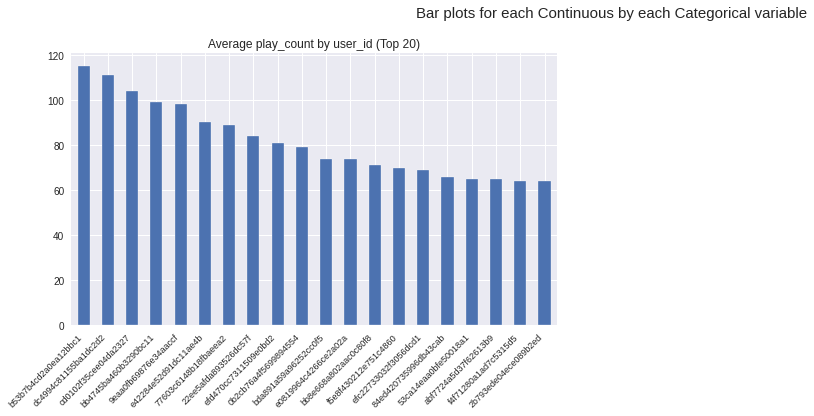

Time to run AutoViz (in seconds) = 1.908

 ###################### VISUALIZATION Completed ########################


In [ ]:
t = AV.AutoViz(filename="",dfte=df2);

---
## <center> 7. Bi-variate Analysis </center>

### <center>7.1 Top 10 Artist Vs Play Counts</center>

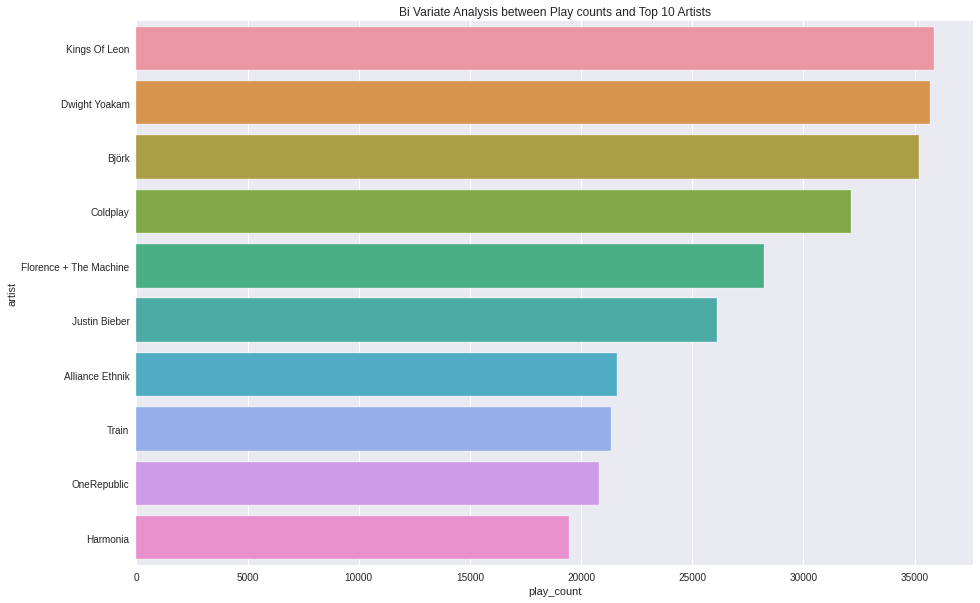

In [ ]:
artist_play_counts = song_df[['artist','play_count']].groupby('artist').sum().reset_index()
top10 = artist_play_counts.sort_values('play_count', ascending = False).head(10)
plt.figure(figsize = (15, 10))
sns.barplot(x = top10['play_count'], y = top10['artist'])
plt.title("Bi Variate Analysis between Play counts and Top 10 Artists")
plt.show()

**Note**

* Kings of Leons have highest played counts in top 10 list
* Harmonia have the lowest played counts in top 10 list

In [ ]:
# Percentage of top 10 artist play counts
fig = px.pie(values = top10['play_count'], names = top10['artist'], title = "Top 10 play counts percentage", hole = 0.2)
fig.show()

### <center>7.2 Top 20 Release Vs Play Counts</center>

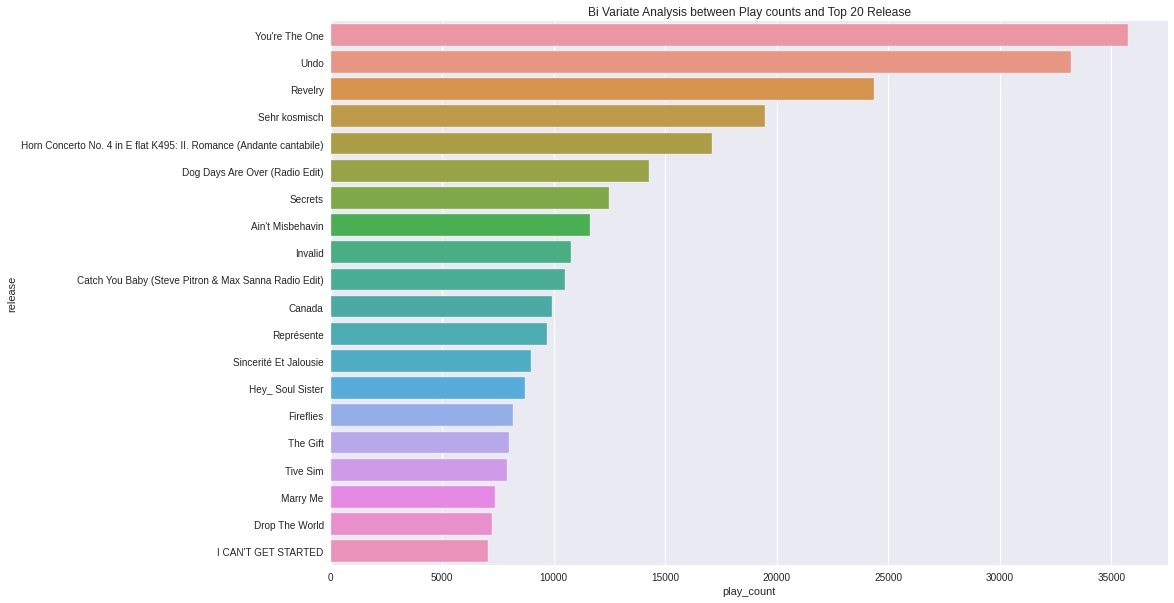

In [ ]:
release_play_counts = song_df[['release','play_count']].groupby('release').sum().reset_index()
top20 = release_play_counts.sort_values('play_count', ascending = False).head(20)
plt.figure(figsize = (15, 10))
sns.barplot(x = top20['play_count'], y = top20['release'])
plt.title("Bi Variate Analysis between Play counts and Top 20 Release")
plt.show()

**Note**

* You're The One has highest played in top 20 releases
* I can't get started has the lowest played count in top 20 release

In [ ]:
# Percentage of top 20 release play counts
fig = px.pie(values = top20['play_count'], names = top20['release'], title = "Top 20 release play counts percentage", hole = 0.1)
fig.show()

### <center>7.3 Top 20 Songs Vs Play Counts</center>

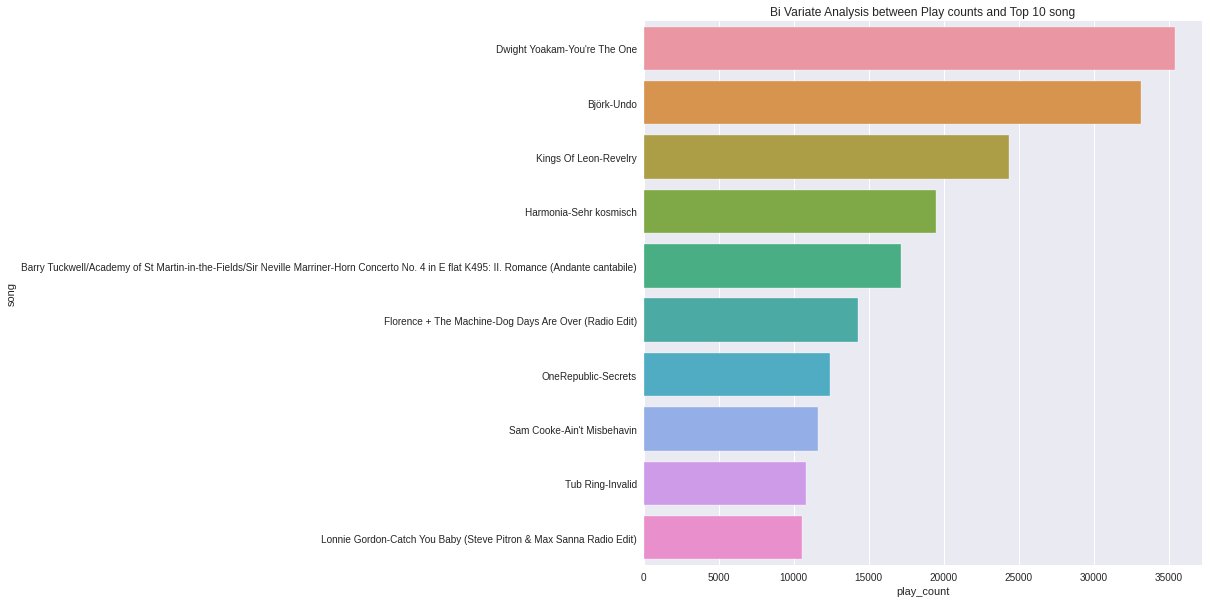

In [ ]:
release_play_counts = song_df[['song','play_count']].groupby('song').sum().reset_index()
song10 = release_play_counts.sort_values('play_count', ascending = False).head(10)
plt.figure(figsize = (10,10))
sns.barplot(x = song10['play_count'], y = song10['song'])
plt.title("Bi Variate Analysis between Play counts and Top 10 song")
plt.show()

In [ ]:
# Percentage of top 20 release play counts

fig = px.pie(values = song10['play_count'], names = song10['song'], title = "Top 10 song play counts percentage", hole = 0.4)
fig.update_layout(showlegend=False)
fig.show()

### <center> 7.4 Summary Of Bi-Variate Analysis </center>
<ul>
    <li>Top Artist per play count is  <b>Kings of Leon</b></li>
    <li>Top release per play count is <b> You are the one </b></li>
    <li>Top artist with the most release count is <b> Dwight Yokoma</b></li>
    <li><b>Top 10 artists</b> :</li>
        <ul>
            <li><b>Kings of Leon</b></li>
            <li><b>Dwight Yokoma</b></li>
            <li><b>Bjork</b></li>
            <li><b>ColdPlay</b></li>
            <li><b>Florence + The Machine</b></li>
            <li><b>Justin Bieber</b></li>
            <li><b>Alliance Ethnik</b></li>
            <li><b>Train</b></li>
            <li><b>OneRepublic</b></li>
            <li><b>Harmonia</b></li>
        </ul>
    <li><b>Top 10 release</b> :</li>
        <ul>
            <li><b>You're the One</b></li>
            <li><b>Undo</b></li>
            <li><b>Revelry</b></li>
            <li><b>Horn Concerto No.4 </b></li>
            <li><b>Dogs Days Are Over(Radio Edit)</b></li>
            <li><b>Secrets</b></li>
            <li><b>Ain't Misbehaving</b></li>
            <li><b>Invalid</b></li>
            <li><b>Catch You Baby(Steve Pitron & Max Sanna Radio Edit) </b></li>
            <li><b>Canada</b></li>
        </ul>
    <li><b>Top 10 Songs (Artist - Release)</b> :</li>
        <ul>
            <li><b>Dwight Yokoma - You're The One</b></li>
            <li><b>Bjork - Undo</b></li>
            <li><b>Kings of Leon - Revelry</b></li>
            <li><b>Harmonia - Sehr kosmisch</b></li>
            <li><b>Bary Tuckwell - Horn Concerto No.4</b></li>
            <li><b>Florence + The Machine - Dog Days Are Over(Radio Edit)</b></li>
            <li><b>OneRepublic - Secrets</b></li>
            <li><b>Sam Cooke - Ain't Misbehavin</b></li>
            <li><b>Tab Ring - Invalid</b></li>
            <li><b>Lonnie Gordon - Catch You Baby(Steve Pitron & Max Sanna Radio Edit) </b></li>
        </ul>
</ul>

---
## <center> 8. Tabuleau Dash Board </center>
<a href="https://public.tableau.com/app/profile/t.sai.nitheesh.kumar.reddy/viz/MillionSongDataset_16235200688160/Dashboard1">Tabuleau DashBoard</a>



---



# <center> Future Work </center>





*   Data Pre-Processing : Dealing With Missing Values and Outliers
*   Building Recommendation System Using :
  * Popularity Based
  * Content Based
  * Collabarative Filtering
  * Neural Networks




---
**<center>Thank You**
---

